In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet_uniform import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_uniform()
loaders = get_loaders(data, 16)
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(32)

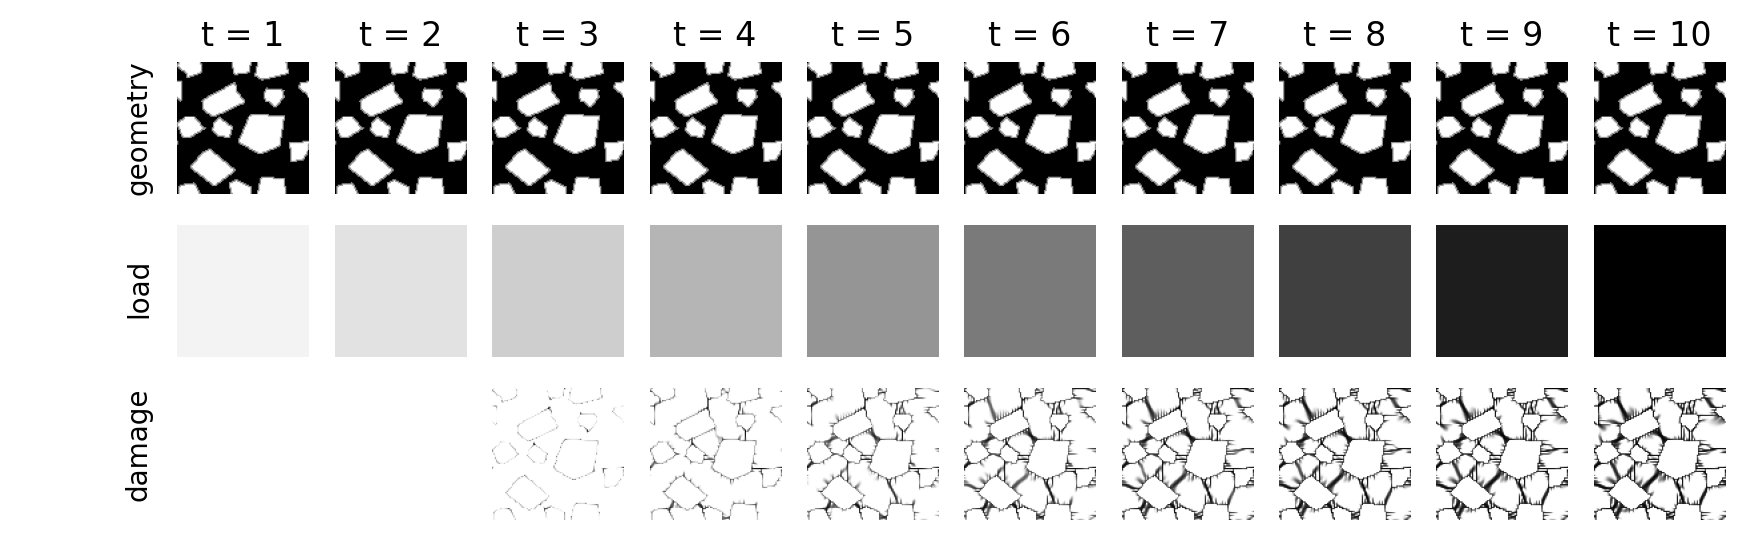

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=11, figsize=(11, 3), dpi=200)
for i in range(10):
    axs[0,i+1].imshow(geometry[0], cmap='Greys', vmin=0, vmax=1)
    axs[0,i+1].set_title(f't = {i+1}')
    axs[0,i+1].set_axis_off()
    axs[1,i+1].imshow(imp_shrinkage[i+1] / (-0.001), cmap='Greys', vmin=0, vmax=1)
    axs[1,i+1].set_axis_off()
    axs[2,i+1].imshow(damage[i], cmap='Greys')
    axs[2,i+1].set_axis_off()
axs[0,0].text(0.8, 0.05, 'geometry', rotation='vertical')
axs[0,0].set_axis_off()
axs[1,0].text(0.8, 0.35, 'load', rotation='vertical')
axs[1,0].set_axis_off()
axs[2,0].text(0.8, 0.2, 'damage', rotation='vertical')
axs[2,0].set_axis_off()

In [3]:
name = 'NN_library/ConvNet/ConvNet_uniform'
args = {'lr' : 0.000001, 'epochs' : 50, 'dev' : dev, 'name' : name}

In [4]:
net = ConvNet(16)

In [5]:
torch.cuda.empty_cache() 

In [6]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 411042


In [15]:
net = load_network(net, args['name']+'_49', args)

In [17]:
losses_train, losses_val = train(net, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.4570150916
Epoch: 0 batch: 100 mean train loss:  0.5001385030
Epoch: 0 batch: 200 mean train loss:  0.4534825273
Epoch: 0 batch: 300 mean train loss:  0.4755428685
Epoch: 0 batch: 400 mean train loss:  0.7460052278
Epoch: 0 batch: 500 mean train loss:  0.4481355771
Epoch: 0 batch: 600 mean train loss:  0.4393373872
Epoch: 0 batch: 700 mean train loss:  0.4882755638
Epoch: 0 mean train loss:  0.5079294688 mean val. rec. loss:  0.5159521699
Epoch: 1 batch: 0 mean train loss:  0.5293922508
Epoch: 1 batch: 100 mean train loss:  0.4899193151
Epoch: 1 batch: 200 mean train loss:  0.3864699542
Epoch: 1 batch: 300 mean train loss:  0.5581481876
Epoch: 1 batch: 400 mean train loss:  0.5903452067
Epoch: 1 batch: 500 mean train loss:  0.5724692987
Epoch: 1 batch: 600 mean train loss:  0.4122419730
Epoch: 1 batch: 700 mean train loss:  0.3780581700
Epoch: 1 mean train loss:  0.5088269900 mean val. rec. loss:  0.5203509331
Epoch: 2 batch: 0 mean train loss:  0.

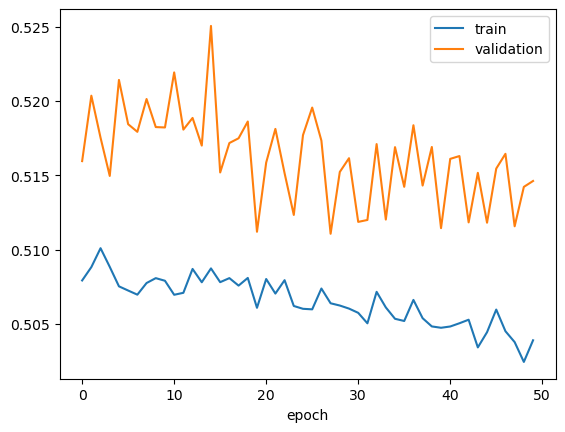

In [18]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])